# Hospital Readmissions Prediction

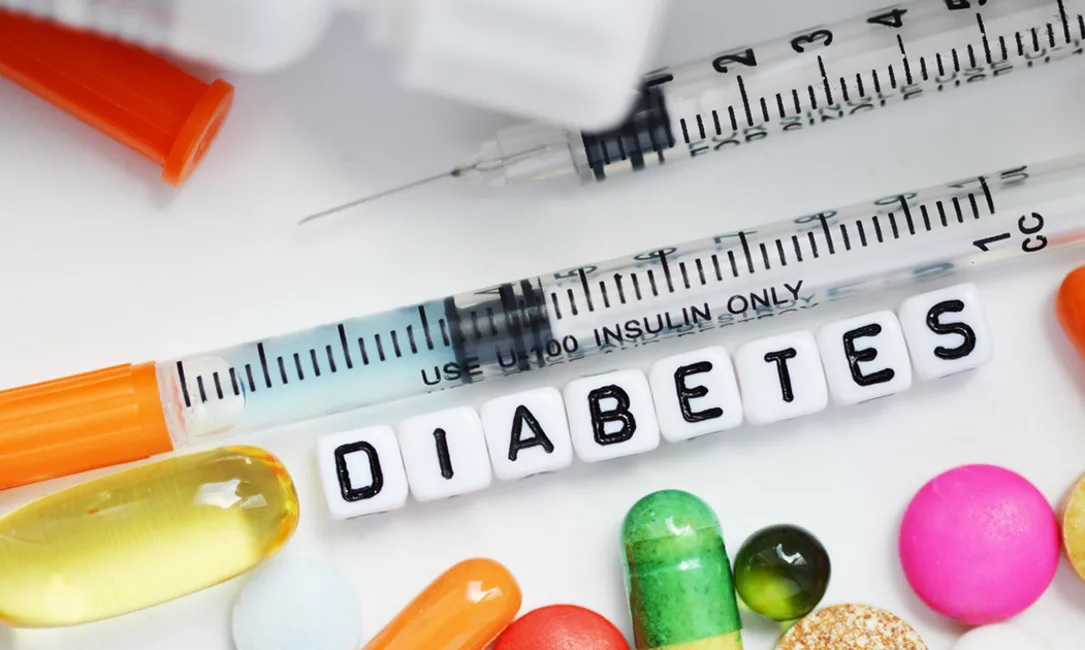

In [1]:
from PIL import Image
Image.open('../input/images/diabet.jpg')

Diabetes, which is at the forefront of diseases of the age, is a disease that plays a leading role in the formation of many deadly diseases and is very common all over the world.

It is important to know whether a patient can be readmitted in a hospital. In this project, we tried predict whether diabetes patients will return to the hospital or not by using machine learning algorithms.

# Content

The data set represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks.

The following steps were followed in this project;
<ol> 
    <li>Exploratory Data Analysis</li>
    <li>Visualization</li>
    <li>Feature Engineering</li>
        <ul>     
         <li> Missing Value Handling</li>
         <li> Outlier Handling</li>
         <li> Encoding</li>
        </ul>
    <li>Splitting Train-Validation-Test</li>
    <li>Modelling</li>
        <ul>     
         <li> Logistic Regression</li>
         <li> Random Forest Classifier</li>
         <li> GradientBoosting Classifier</li>
         <li> XGboost Classifier</li>
         <li> Light-GBM Classifier</li>
         <li> CatBoost Classifier</li>
        </ul>
    <li>Feature Importance</li>
    <li>Hyperparameter Tuning</li>
    <li>Predict results</li>
</ol> 

# 1. Exploratory Data Analysis

## Importing Libraries

In [15]:
import numpy as np
import pandas as pd

# Visualization
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_fscore_support

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# !pip install catboost
from catboost import CatBoostClassifier

In [16]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading Data

In [17]:
data = pd.read_csv("diabetic_data.csv")
def display_all(data):
    with pd.option_context("display.max_row", 100, "display.max_columns", 100):
        display(data)
display_all(data.head())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Variable Description

Encounter ID: Unique identifier of an encounter
    
Patient number: Unique identifier of a patient
    
Race Values: Caucasian, Asian, African American, Hispanic, and other
    
Gender Values: male, female, and unknown/invalid
    
Age: Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
        
Weight: Weight in pounds
    
Admission type: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
    
Discharge disposition: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

Admission source: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

Time in hospital: Integer number of days between admission and discharge

Payer code : Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

Medical specialty: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

Number of lab procedures: Number of lab tests performed during the encounter

Number of procedures: Numeric Number of procedures (other than lab tests) performed during the encounter

Number of medications: Number of distinct generic names administered during the encounter

Number of outpatient visits: Number of outpatient visits of the patient in the year preceding the encounter

Number of emergency visits: Number of emergency visits of the patient in the year preceding the encounter

Number of inpatient visits: Number of inpatient visits of the patient in the year preceding the encounter

Diagnosis 1: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

Diagnosis 2: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

Diagnosis 3: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

Number of diagnoses : Number of diagnoses entered to the system 0%

Glucose serum test : result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

A1c test result : Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

Change of medications : Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

Diabetes medications : Indicates if there was any diabetic medication prescribed. Values: “yes” and “no” 24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

Readmitted: Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [18]:
data.shape

(101766, 50)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [21]:
IDs_mapping = pd.read_csv("../input/diabetesdataset/IDs_mapping.csv")
        
display_all(IDs_mapping.head(67))

FileNotFoundError: [Errno 2] No such file or directory: '../input/diabetesdataset/IDs_mapping.csv'

## Target Distribution

Target content changed to 1-0

The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not.

The variable actually has <30, >30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

In [22]:
data.readmitted = [1 if each=='<30' else 0 for each in data.readmitted]

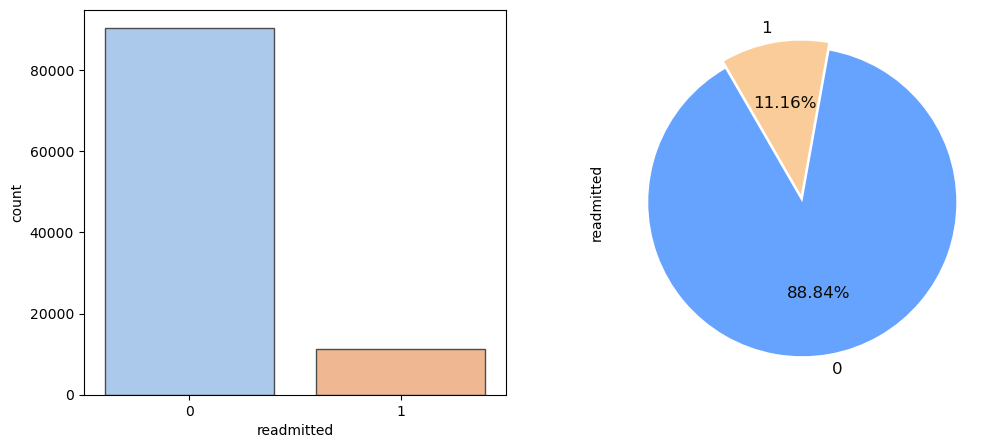

In [23]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['0','1']
sns.countplot(x=data.readmitted, data=data, palette="pastel",ax=ax[0], edgecolor=".3")
data.readmitted.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

In [24]:
data.replace('?', np.nan , inplace=True)

## Information about Missing values

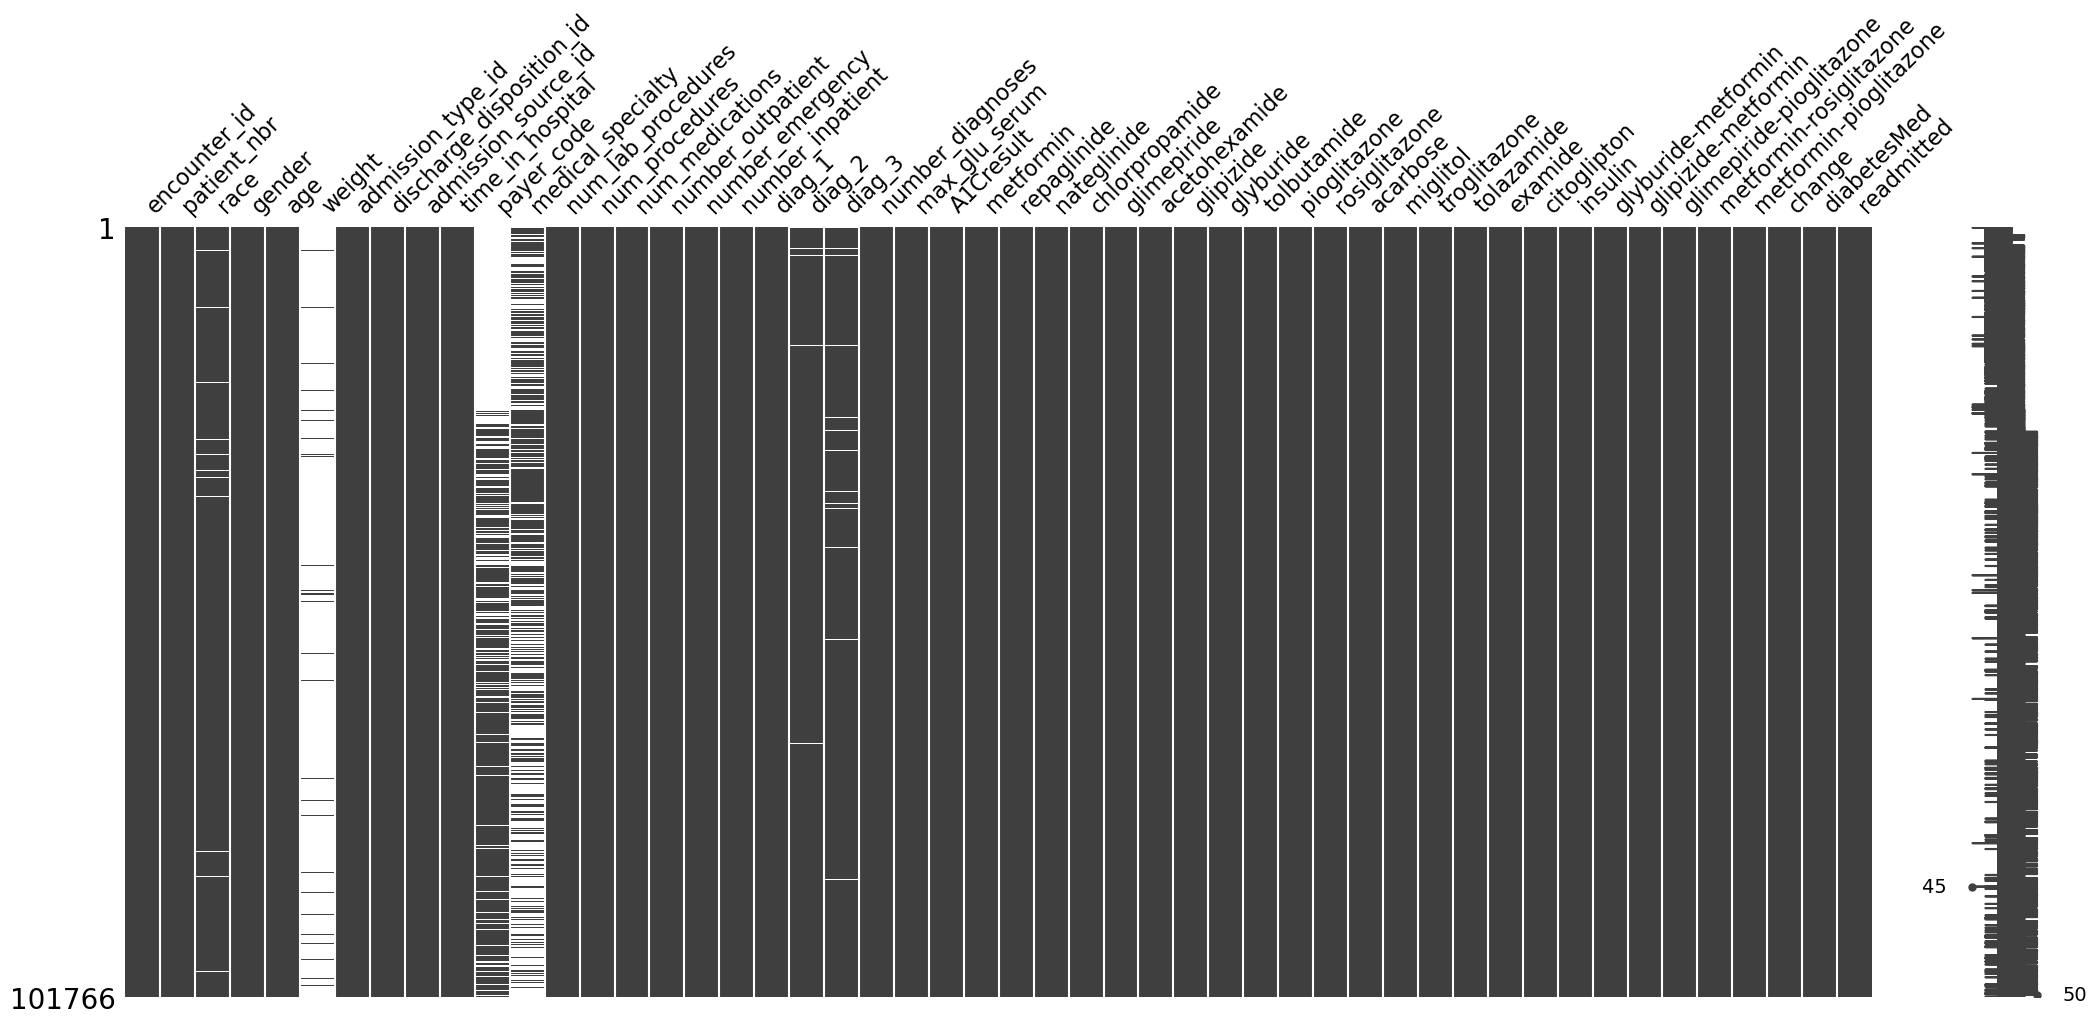

In [25]:
msno.matrix(data)
plt.show()

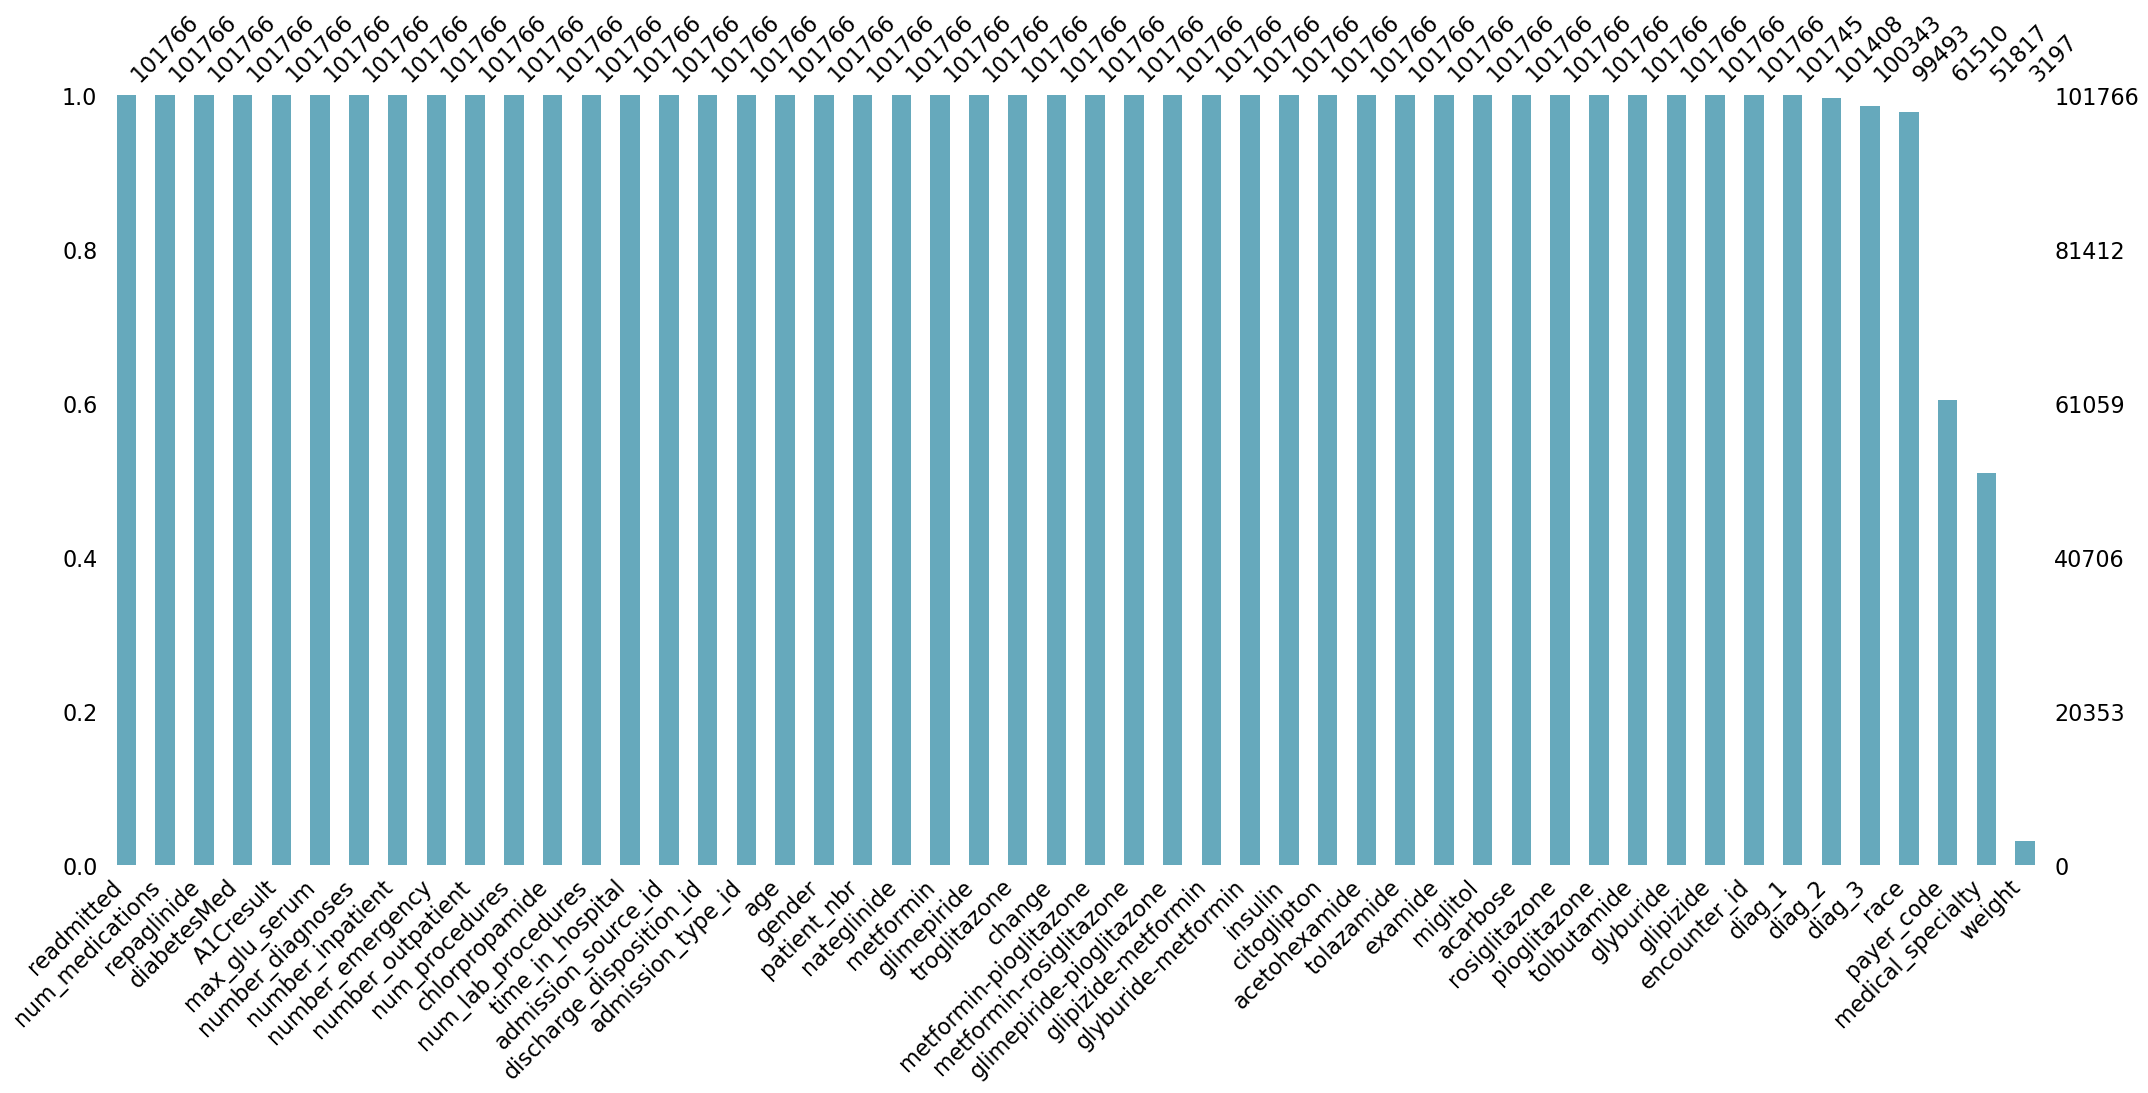

In [26]:
msno.bar(data,sort='descending',color='#66a9bc')
plt.show()

## Representation of missing values, unique values, etc.

In [27]:
def Missing_Values(data):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],4))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "#_Total_Value":total_value,\
                               "#_Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("#_Total_Missing_Value",ascending=False)

In [28]:
data_info = Missing_Values(data)
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
weight,101766,98569,0.9686,object,"[nan, [75-100), [50-75), [0-25), [100-125), [2...",10
medical_specialty,101766,49949,0.4908,object,"[Pediatrics-Endocrinology, nan, InternalMedici...",73
payer_code,101766,40256,0.3956,object,"[nan, MC, MD, HM, UN, BC, SP, CP, SI, DM, CM, ...",18
race,101766,2273,0.0223,object,"[Caucasian, AfricanAmerican, nan, Other, Asian...",6
diag_3,101766,1423,0.0140,object,"[nan, 255, V27, 403, 250, V45, 38, 486, 996, 1...",790
diag_2,101766,358,0.0035,object,"[nan, 250.01, 250, 250.43, 157, 411, 492, 427,...",749
diag_1,101766,21,0.0002,object,"[250.83, 276, 648, 8, 197, 414, 428, 398, 434,...",717
encounter_id,101766,0,0.0000,int64,"[2278392, 149190, 64410, 500364, 16680, 35754,...",101766
tolazamide,101766,0,0.0000,object,"[No, Steady, Up]",3


## Types of data measurement scales

In [29]:
data_dictionary = pd.read_csv('../input/diabetesdataset/var.csv', sep=';')
data_dictionary = data_dictionary.set_index("variable_name")
data_dictionary.head()

FileNotFoundError: [Errno 2] No such file or directory: '../input/diabetesdataset/var.csv'

In [30]:
data_info['Variable_Structure'] = np.array(data_dictionary["Variable_Structure"])
data_info

NameError: name 'data_dictionary' is not defined

Columns that would not give information were removed

In [31]:
drop_list = ['examide' , 'citoglipton', 'weight','encounter_id','patient_nbr','payer_code','medical_specialty']  
data.drop(drop_list,axis=1, inplace=True)
data_info.drop(drop_list, axis=0,inplace=True)

## Determination of numerical columns:

In [33]:
numerical_columns = list(data_info.loc[(data_info.loc[:,"Variable_Structure"]=="numeric")].index)
len(numerical_columns), numerical_columns

KeyError: 'Variable_Structure'

## Determination of categorical columns:

In [34]:
categorical_columns = list(data_info.loc[(data_info.loc[:,"Variable_Structure"]=="nominal")].index)
len(categorical_columns), categorical_columns

KeyError: 'Variable_Structure'

# 2. VİSUALİZATİON

## Outlier Visualization With BoxPlot:

In [35]:
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.boxplot(x = df[columns[count]], palette="Wistia",ax=ax[i][j])  # palette = rocket, Wistia
            count = count+1

In [36]:
boxplot_for_outlier(data,numerical_columns)

NameError: name 'numerical_columns' is not defined

NameError: name 'numerical_columns' is not defined

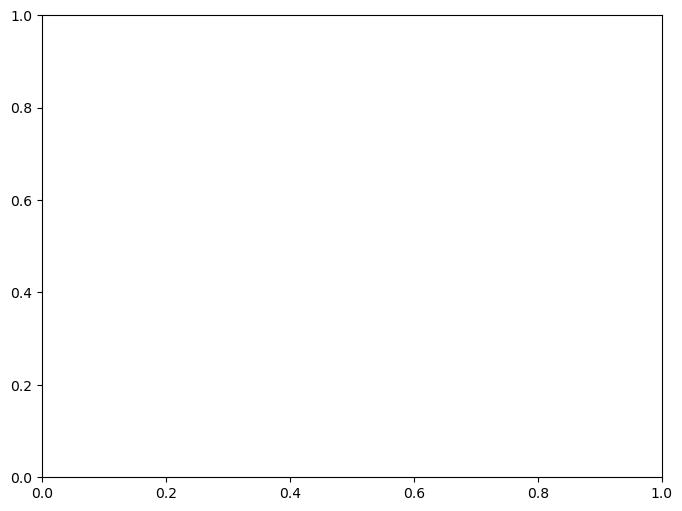

In [37]:
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data[numerical_columns].corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax,cmap="coolwarm")
plt.show()

## Gender Distribution

In [38]:
data.gender.replace('Unknown/Invalid', np.nan , inplace=True)
data.dropna(subset=['gender'], how='all', inplace = True)

In [39]:
data.gender.value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

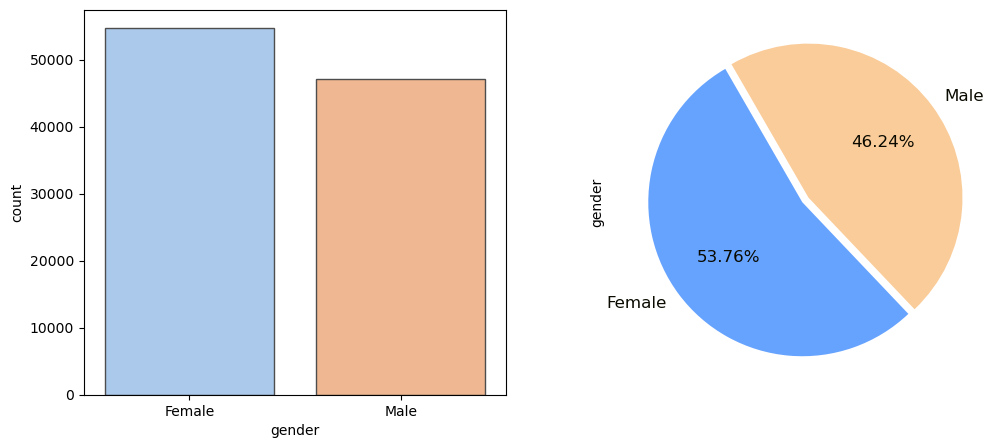

In [40]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['Female','Male']
sns.countplot(x=data.gender, data=data, palette="pastel",ax=ax[0], edgecolor=".3")
data.gender.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

### Gender, Age and Race Visualization

ValueError: Cannot use `hue` without `x` and `y`

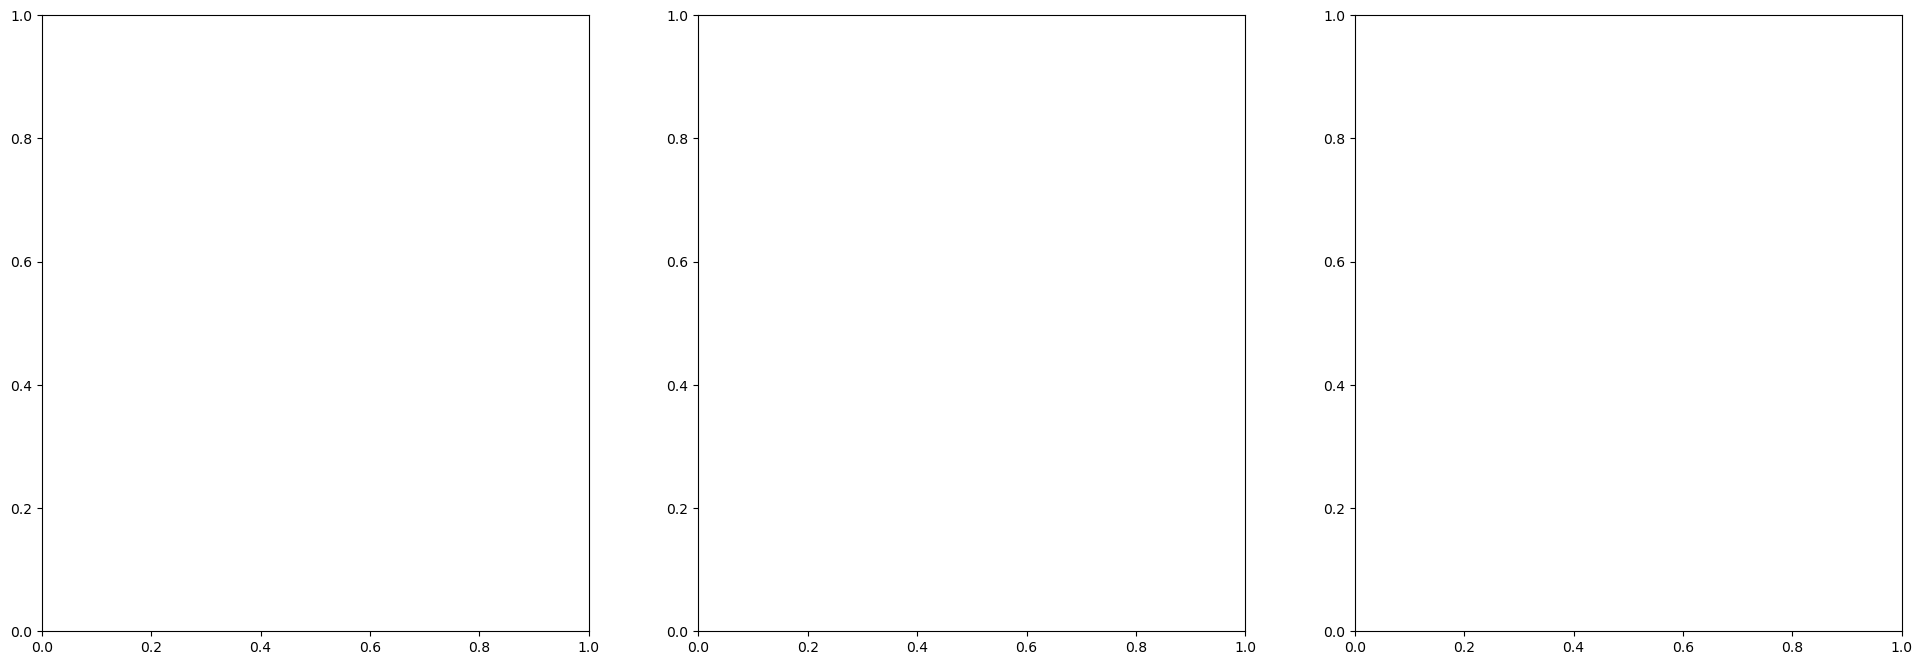

In [41]:
visual_list = ['gender','age','race']
fig, ax =plt.subplots(nrows=1,ncols=3,figsize=(24,8))
count =0
for i in visual_list:
    sns.countplot(data[i], hue=data.readmitted, palette='YlOrBr', ax=ax[count]);
    count = count+1

### Examination and visualization of the effect of the target variable on insulin variable

In [28]:
data.groupby(by = "insulin").readmitted.mean()

insulin
Down      0.138975
No        0.100380
Steady    0.111284
Up        0.129905
Name: readmitted, dtype: float64

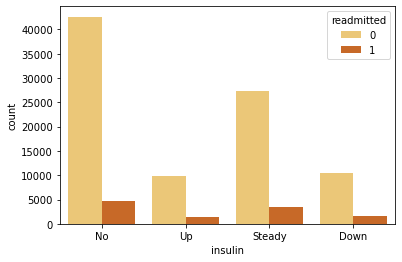

In [29]:
sns.countplot(x="insulin", hue="readmitted", data=data, palette="YlOrBr")
plt.show()

### Visualization of the insulin variable according to the age variable:

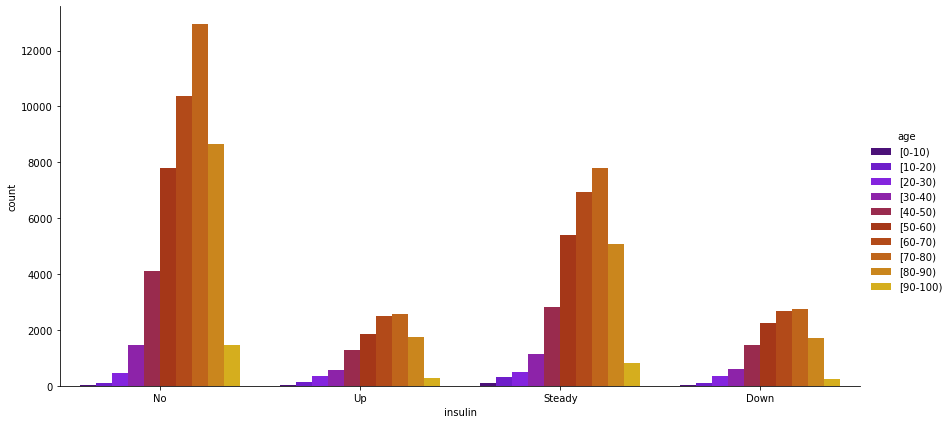

In [30]:
age_list = list(data.age.unique())
sns.catplot(x="insulin", hue="age", data=data, kind="count", height=6, aspect=2, palette="gnuplot");

# 3. Feature Engineering

## Missing Value Filling

In [31]:
data["race"].fillna(data["race"].mode()[0], inplace = True)

In [32]:
data["race"].isnull().sum()

0

In [33]:
data = data.loc[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

### Diagnostics 1-2-3 Transform

In [34]:
diag_list = ['diag_1','diag_2','diag_3']

for col in diag_list:
    data[col].fillna('NaN', inplace=True)

In [35]:
import re
import numpy as np
def transformFunc(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NaN', "-1", value) # Nan 
    return value

def transformCategory(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category

def diag_transform(value):
    if value==250:
        category = 1
    else :
        category = 0
        
    return category

In [36]:
for col in diag_list:
    data[col] = data[col].apply(transformFunc)
    data[col] = data[col].astype(float)

In [37]:
for col in diag_list:
    data[col] = data[col].apply(transformCategory)

### Distribution of Diag_1, Diag_2 and Diag_3 Variables by Target Variable:

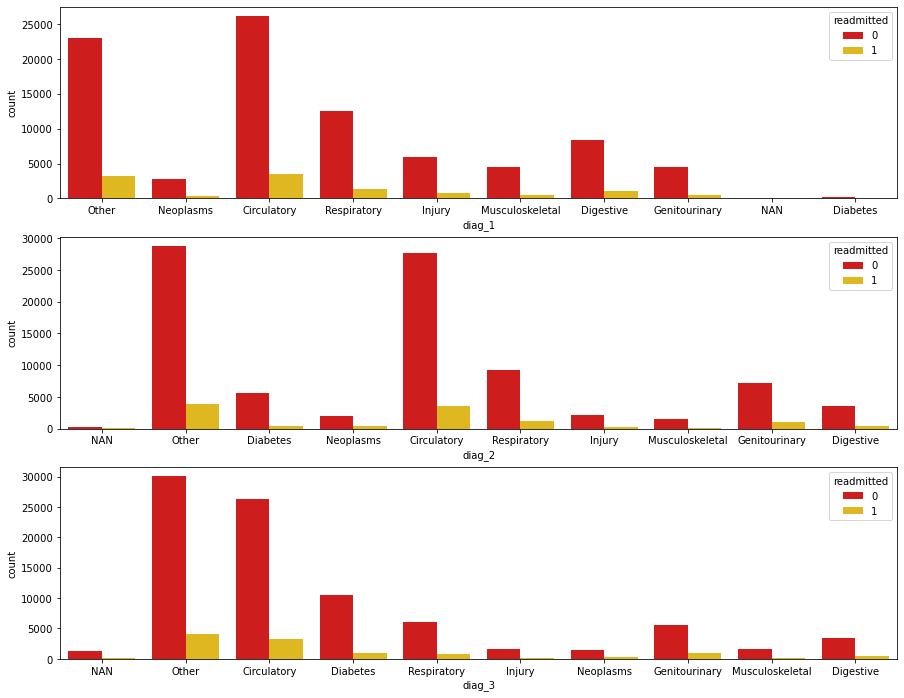

In [38]:
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(15,12))
count =0
for i in diag_list:
    sns.countplot(data[i], hue=data.readmitted, palette='hot', ax=ax[count]);
    count = count+1

## Local Outlier Factor

In [39]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 2 , contamination = 0.1)
clf.fit_predict(data[numerical_columns])

array([-1, -1,  1, ..., -1,  1,  1])

In [40]:
df_scores = clf.negative_outlier_factor_
df_scores[0:30]

array([-1.57313218e+00, -5.00000000e+09, -1.21803487e+00, -1.00000000e+00,
       -1.00000000e+00, -1.20710678e+00, -1.11237244e+00, -1.41421356e+00,
       -1.00000000e+00, -1.19553853e+00, -8.53553391e-01, -1.00000000e+00,
       -1.29289322e+00, -1.15973961e+00, -1.14322501e+00, -1.05511154e+00,
       -1.20710678e+00, -9.26776695e-01, -8.53553391e-01, -1.03033009e+00,
       -1.29289322e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.05618622e+00, -1.00000000e+00,
       -1.07647405e+00, -1.00000000e+00])

In [41]:
np.sort(df_scores)[0:30]

array([-4.00000000e+10, -3.51776695e+10, -2.91421356e+10, -2.79110350e+10,
       -2.44948974e+10, -2.23606798e+10, -2.23606798e+10, -2.23536866e+10,
       -2.00000000e+10, -2.00000000e+10, -2.00000000e+10, -1.75000000e+10,
       -1.73205081e+10, -1.73205081e+10, -1.73205081e+10, -1.73205081e+10,
       -1.73205081e+10, -1.73205081e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10])

In [42]:
threshold_value = np.sort(df_scores)[2]

In [43]:
outlier_tf = df_scores > threshold_value
outlier_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [44]:
new_df = data[df_scores > threshold_value]

In [45]:
data[df_scores < threshold_value]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
93655,Caucasian,Female,[70-80),3,6,1,5,35,0,15,...,No,Up,No,No,No,No,No,Ch,Yes,0
97761,Caucasian,Male,[60-70),1,1,7,3,65,0,8,...,No,No,No,No,No,No,No,No,No,0


In [46]:
# Custom encoding for the 21 Drug Features
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for col in keys:
    data[col] = data[col].replace(['No','Steady','Up','Down'],[0,1,1,1])
    data[col] = data[col].astype(int)

In [47]:
# A1Cresult and max_glu_serum
data['A1Cresult'] = data['A1Cresult'].replace(['>7','>8','Norm','None'],[1,1,0,-99])
data['max_glu_serum'] = data['max_glu_serum'].replace(['>200','>300','Norm','None'],[1,1,0,-99])

In [48]:
# One hot Encoding Race and Id's 
one_hot_data = pd.get_dummies(data, columns=['race'], prefix=["enc"])

columns_ids = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

one_hot_data[columns_ids] = one_hot_data[columns_ids].astype('str')
one_hot_data = pd.get_dummies(one_hot_data, columns=columns_ids)

# 4. Train-Test Splitting

In [49]:
df = one_hot_data.copy()
X = df.drop(columns="readmitted", axis=1)
Y = df.readmitted

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

## Encoding

In [51]:
ordinal_enc = OrdinalEncoder()
X_train.age = ordinal_enc.fit_transform(X_train.age.values.reshape(-1, 1))
X_test.age = ordinal_enc.transform(X_test.age.values.reshape(-1, 1))

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [52]:
for col in diag_list:
    label_enc = LabelEncoder()
    X_train[col] = label_enc.fit_transform(X_train[col])
    X_test[col] = label_enc.fit_transform(X_test[col]) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [53]:
binary = ['change', 'diabetesMed', 'gender']

from category_encoders import BinaryEncoder
binary_enc = BinaryEncoder(cols=binary)
binary_enc.fit_transform(X_train)
X_train = binary_enc.fit_transform(X_train)
X_test = binary_enc.transform(X_test)

### Resampling techniques — Undersample majority class

In [54]:
from sklearn.utils import resample

X = pd.concat([X_train, y_train], axis=1)

not_readmitted = X[X.readmitted==0]
readmitted = X[X.readmitted==1]

not_readmitted_sampled = resample(not_readmitted,
                                replace = False, 
                                n_samples = len(readmitted),
                                random_state = 42)

downsampled = pd.concat([not_readmitted_sampled, readmitted])

downsampled.readmitted.value_counts()

1    9077
0    9077
Name: readmitted, dtype: int64

In [55]:
y_train = downsampled.readmitted
X_train = downsampled.drop('readmitted', axis=1)

## Train-Validation Splitting

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

# 5. Modelling

## Model Selection

In [11]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix as cm

In [12]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    fscore = f1_score(y_actual,(y_pred > thresh) )
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('fscore:%.3f'%fscore)
    print('specificity:%.3f'%specificity)
    print(' ')
    return auc, accuracy, recall, precision,fscore, specificity

In [13]:
thresh = 0.5

## Model Selection: Baseline Models

## Logistic Regression

In [14]:
log_model = LogisticRegression(solver = "liblinear",class_weight="balanced",random_state = 42).fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [61]:
y_train_preds = log_model.predict_proba(X_train)[:,1]
y_val_preds = log_model.predict_proba(X_val)[:,1]

print("Logistic Regression")
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_fscore, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_val_auc, lr_val_accuracy, lr_val_recall, \
    lr_val_precision,lr_val_fscore, lr_val_specificity = print_report(y_val,y_val_preds, thresh)

Logistic Regression
Training:
AUC:0.675
accuracy:0.623
recall:0.547
precision:0.645
fscore:0.592
specificity:0.699
 
Validation:
AUC:0.644
accuracy:0.600
recall:0.535
precision:0.617
fscore:0.573
specificity:0.666
 


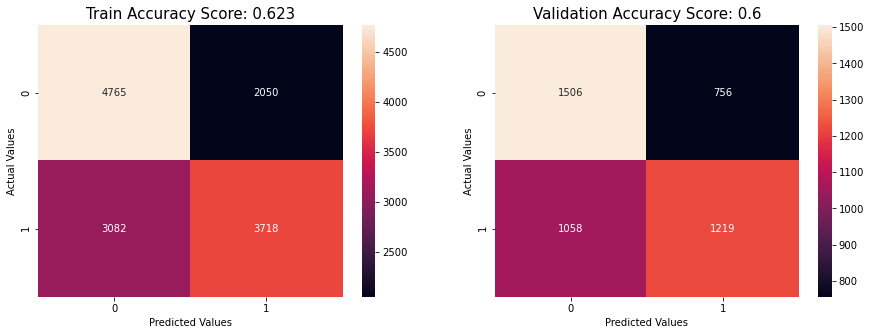

In [62]:
# Confusion Matrix

predictions = log_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = log_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

## Random Forest Classifier

In [63]:
random_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100, max_depth=3)
random_forest_model.fit(X_train, y_train) 

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=42)

In [64]:
y_train_preds = random_forest_model.predict_proba(X_train)[:,1]
y_val_preds = random_forest_model.predict_proba(X_val)[:,1]

print("Random Forest")
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision,rf_train_fscore, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_val_auc, rf_val_accuracy, rf_val_recall, rf_val_precision,rf_val_fscore, rf_val_specificity = print_report(y_val,y_val_preds, thresh)

Random Forest
Training:
AUC:0.668
accuracy:0.620
recall:0.589
precision:0.628
fscore:0.608
specificity:0.651
 
Validation:
AUC:0.640
accuracy:0.598
recall:0.577
precision:0.604
fscore:0.590
specificity:0.620
 


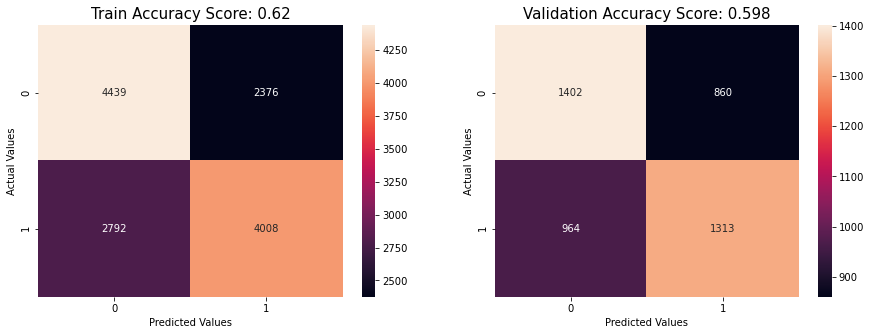

In [65]:
# Confusion Matrix

predictions = random_forest_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = random_forest_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

## Gradient Boosting Classifier

In [66]:
gradient_model = GradientBoostingClassifier(random_state=42)
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [67]:
y_train_preds = gradient_model.predict_proba(X_train)[:,1]
y_val_preds = gradient_model.predict_proba(X_val)[:,1]

print("Gradient Boosing")
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision,gbc_train_fscore, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_val_auc, gbc_val_accuracy, gbc_val_recall, gbc_val_precision, gbc_val_fscore, gbc_val_specificity = print_report(y_val,y_val_preds, thresh)

Gradient Boosing
Training:
AUC:0.700
accuracy:0.646
recall:0.615
precision:0.656
fscore:0.635
specificity:0.677
 
Validation:
AUC:0.654
accuracy:0.613
recall:0.596
precision:0.618
fscore:0.607
specificity:0.629
 


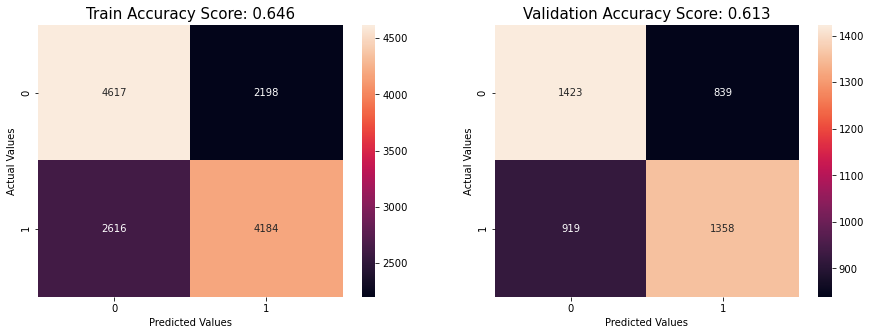

In [68]:
# Confusion Matrix

predictions = gradient_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = gradient_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

## XGBOOST Classifier

In [69]:
xgb_model = XGBClassifier(random_state=42, n_jobs=-1,max_depth=3)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
y_train_preds = xgb_model.predict_proba(X_train)[:,1]
y_val_preds = xgb_model.predict_proba(X_val)[:,1]

print("XGBOOST")
y_train_preds = gradient_model.predict_proba(X_train)[:,1]
y_val_preds = gradient_model.predict_proba(X_val)[:,1]

print("Gradient Boosing")
print('Training:')
xgb_train_auc, xgb_train_accuracy, xgb_train_recall, xgb_train_precision, xgb_train_fscore, xgb_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
xgb_val_auc, xgb_val_accuracy, xgb_val_recall, xgb_val_precision,xgb_val_fscore, xgb_val_specificity = print_report(y_val,y_val_preds, thresh)

XGBOOST
Gradient Boosing
Training:
AUC:0.700
accuracy:0.646
recall:0.615
precision:0.656
fscore:0.635
specificity:0.677
 
Validation:
AUC:0.654
accuracy:0.613
recall:0.596
precision:0.618
fscore:0.607
specificity:0.629
 


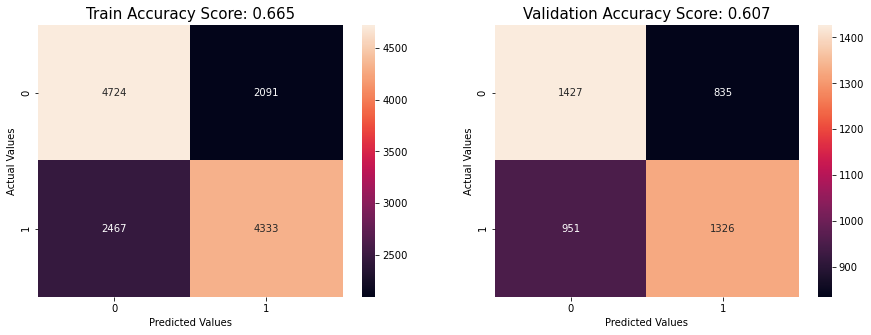

In [71]:
# Confusion Matrix

predictions = xgb_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = xgb_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

## Light-GBM Classifier

In [72]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state = 42,max_depth=3)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(max_depth=3, random_state=42)

In [73]:
y_train_preds = lgbm_model.predict_proba(X_train)[:,1]
y_val_preds = lgbm_model.predict_proba(X_val)[:,1]

print("LGBM")
print('Training:')
lgbm_train_auc, lgbm_train_accuracy,lgbm_train_recall, lgbm_train_precision,lgbm_train_fscore,lgbm_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lgbm_val_auc, lgbm_val_accuracy, lgbm_val_recall, lgbm_val_precision,lgbm_val_fscore,lgbm_val_specificity = print_report(y_val,y_val_preds, thresh)

LGBM
Training:
AUC:0.698
accuracy:0.646
recall:0.614
precision:0.656
fscore:0.634
specificity:0.678
 
Validation:
AUC:0.654
accuracy:0.610
recall:0.591
precision:0.616
fscore:0.603
specificity:0.629
 


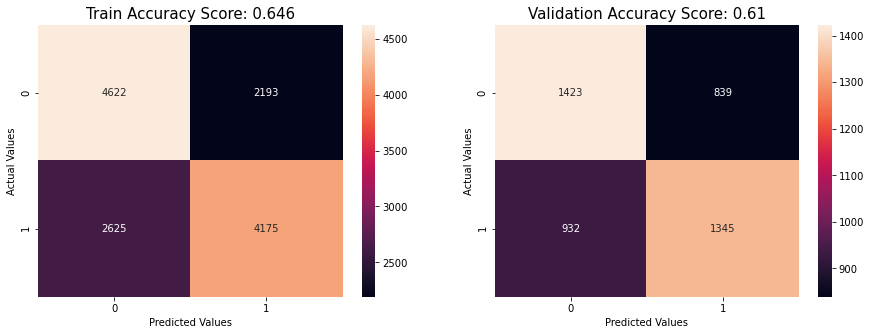

In [74]:
# Confusion Matrix

predictions = lgbm_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = lgbm_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

## CATBOOST Classifier

In [75]:
cat_model = CatBoostClassifier(random_state = 42, max_depth=3)
cat_model.fit(X_train, y_train,verbose=False)

In [76]:
y_train_preds = cat_model.predict_proba(X_train)[:,1]
y_val_preds = cat_model.predict_proba(X_val)[:,1]

print("CATBOOST")
print('Training:')
catb_train_auc, catb_train_accuracy,catb_train_recall, catb_train_precision,catb_train_fscore,catb_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
catb_val_auc,catb_val_accuracy, catb_val_recall, catb_val_precision,catb_val_fscore,catb_val_specificity = print_report(y_val,y_val_preds, thresh)

CATBOOST
Training:
AUC:0.719
accuracy:0.659
recall:0.618
precision:0.673
fscore:0.644
specificity:0.701
 
Validation:
AUC:0.657
accuracy:0.613
recall:0.585
precision:0.621
fscore:0.603
specificity:0.641
 


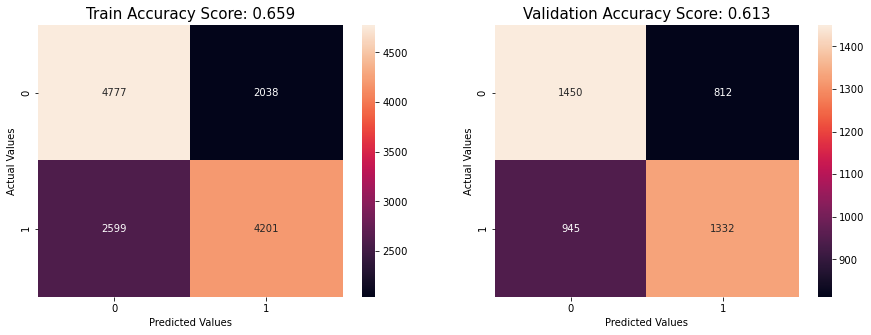

In [77]:
# Confusion Matrix

predictions = cat_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = cat_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

## Analyze results baseline models

In [78]:
base_models_results = pd.DataFrame({'classifier':['LOJ','LOJ','RF','RF','GBM','GBM','XGB','XGB','LGBM','LGBM','CATB','CATB'],
                           'data_set':['train','val']*6,
                          'auc':[lr_train_auc, lr_val_auc,rf_train_auc,rf_val_auc,gbc_train_auc,gbc_val_auc,xgb_train_auc,xgb_val_auc,lgbm_train_auc,lgbm_val_auc,catb_train_auc,catb_val_auc,],
                          'accuracy':[lr_train_accuracy, lr_val_accuracy,rf_train_accuracy,rf_val_accuracy,gbc_train_accuracy,gbc_val_accuracy,xgb_train_accuracy,xgb_val_accuracy,lgbm_train_accuracy,lgbm_val_accuracy,catb_train_accuracy,catb_val_accuracy,],
                          'recall':[lr_train_recall, lr_val_recall,rf_train_recall,rf_val_recall,gbc_train_recall,gbc_val_recall,xgb_train_recall,xgb_val_recall,lgbm_train_recall,lgbm_val_recall,catb_train_recall,catb_val_recall,],
                          'precision':[lr_train_precision, lr_val_precision,rf_train_precision,rf_val_precision,gbc_train_precision,gbc_val_precision,xgb_train_precision,xgb_val_precision,lgbm_train_precision,lgbm_val_precision,catb_train_precision,catb_val_precision,],
                          'fscore':[lr_train_fscore, lr_val_fscore,rf_train_fscore,rf_val_fscore,gbc_train_fscore,gbc_val_fscore,xgb_train_fscore,xgb_val_fscore,lgbm_train_fscore,lgbm_val_fscore,catb_train_fscore,catb_val_fscore,],
                          'specificity':[lr_train_specificity, lr_val_specificity,rf_train_specificity,rf_val_specificity,gbc_train_specificity,gbc_val_specificity,xgb_train_specificity,xgb_val_specificity,lgbm_train_specificity,lgbm_val_specificity,catb_train_specificity,catb_val_specificity,]})

In [79]:
base_models_results

,classifier,data_set,auc,accuracy,recall,precision,fscore,specificity
0,LOJ,train,0.674694,0.623063,0.546765,0.644591,0.591661,0.699193
1,LOJ,val,0.643850,0.600353,0.535354,0.617215,0.573377,0.665782
2,RF,train,0.667576,0.620419,0.589412,0.627820,0.608010,0.651357
3,RF,val,0.640279,0.598149,0.576636,0.604234,0.590112,0.619805
4,GBM,train,0.700067,0.646419,0.615294,0.655594,0.634805,0.677476
5,GBM,val,0.653895,0.612690,0.596399,0.618116,0.607063,0.629089
6,XGB,train,0.700067,0.646419,0.615294,0.655594,0.634805,0.677476
7,XGB,val,0.653895,0.612690,0.596399,0.618116,0.607063,0.629089
8,LGBM,train,0.697602,0.646126,0.613971,0.655622,0.634113,0.678210
9,LGBM,val,0.653716,0.609826,0.590690,0.615842,0.603004,0.629089


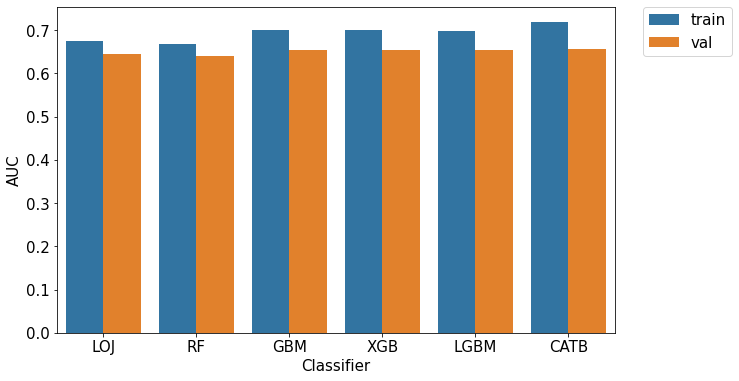

In [80]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=base_models_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

# 6. Feature Importance

## Feature İmportance with Light-GBM Classifier

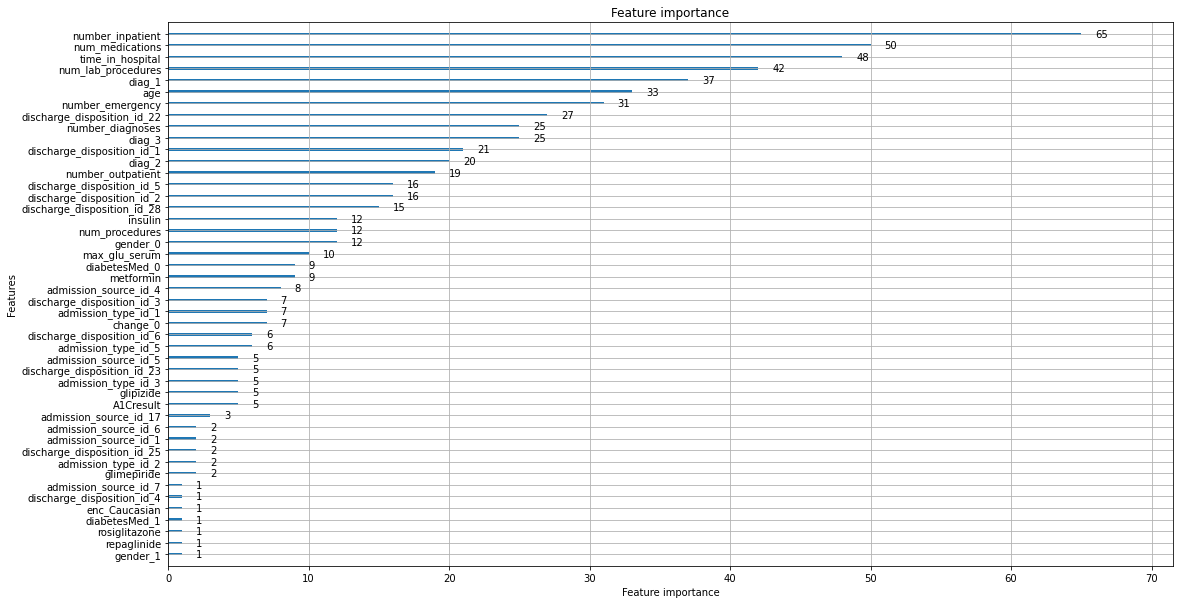

In [81]:
import lightgbm as lgb

plt.rcParams["figure.figsize"] = (18, 10)
lgb.plot_importance(lgbm_model)

feature_imp = pd.Series(lgbm_model.feature_importances_, index = X_train.columns)
best_features = feature_imp.nlargest(25)

In [82]:
best_features.index

Index(['number_inpatient', 'num_medications', 'time_in_hospital',
       'num_lab_procedures', 'diag_1', 'age', 'number_emergency',
       'discharge_disposition_id_22', 'diag_3', 'number_diagnoses',
       'discharge_disposition_id_1', 'diag_2', 'number_outpatient',
       'discharge_disposition_id_2', 'discharge_disposition_id_5',
       'discharge_disposition_id_28', 'gender_0', 'num_procedures', 'insulin',
       'max_glu_serum', 'metformin', 'diabetesMed_0', 'admission_source_id_4',
       'change_0', 'admission_type_id_1'],
      dtype='object')

In [83]:
X_train_importance = X_train[best_features.index]
X_val_importance = X_val[best_features.index]
X_test_importance = X_test[best_features.index]

# 7. Hyperparameter tuning

## Random Forest Classifier Model Tuning

In [84]:
rf = RandomForestClassifier()

In [85]:
rf_params = {"max_depth": [2,5,8],
             "n_estimators": [100,200,500,700],
             "max_features": [3,5,8],
             "min_samples_split":[2,5,10]}

In [86]:
rf_cv_model = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1, verbose=2).fit(X_train_importance, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  5.3min finished


In [87]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_split': 10,
 'n_estimators': 700}

In [88]:
rf_tuned =RandomForestClassifier(max_depth=5,
                                 max_features=5,
                                 min_samples_split=5,
                                 n_estimators=500).fit(X_train_importance, y_train)

In [89]:
y_train_preds = random_forest_model.predict_proba(X_train)[:,1]
y_val_preds = random_forest_model.predict_proba(X_val)[:,1]
y_test_preds = random_forest_model.predict_proba(X_test)[:,1]

print('Baseline Random Forest')
rf_train_auc_base = roc_auc_score(y_train, y_train_preds)
rf_val_auc_base = roc_auc_score(y_val, y_val_preds)
rf_test_auc_base = roc_auc_score(y_test, y_test_preds)

print('Training AUC:%.3f'%(rf_train_auc_base))
print('Validation AUC:%.3f'%(rf_val_auc_base))
print('Test AUC:%.3f'%(rf_test_auc_base))

print('Optimized Random Forest')
y_train_preds_random = rf_tuned.predict_proba(X_train_importance)[:,1]
y_val_preds_random = rf_tuned.predict_proba(X_val_importance)[:,1]
y_test_preds_random = rf_tuned.predict_proba(X_test_importance)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_val_auc = roc_auc_score(y_val, y_val_preds_random)
rf_test_auc = roc_auc_score(y_test, y_test_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_val_auc))
print('Test AUC:%.3f'%(rf_test_auc))

Baseline Random Forest
Training AUC:0.668
Validation AUC:0.640
Test AUC:0.652
Optimized Random Forest
Training AUC:0.684
Validation AUC:0.651
Test AUC:0.662


## Ligth-GBM Classifier Model Tuning

In [90]:
lgbm=LGBMClassifier()

In [91]:
lgbm_params = {"learning_rate":[0.01,0.1,0.05],
              "n_estimators": [100,200,500],
               "subsample":[0.1,0.2],
              "max_depth":[2,3,5,8]}

In [92]:
lgbm_cv_model=GridSearchCV(lgbm,lgbm_params,cv=3,n_jobs=-1,verbose=2).fit(X_train_importance,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   44.5s finished


In [93]:
lgbm_cv_model.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 500, 'subsample': 0.1}

In [94]:
lgbm_tuned=LGBMClassifier(learning_rate=0.1,max_depth=2,n_estimators=200,subsample= 0.1).fit(X_train_importance, y_train)

In [95]:
y_train_preds = lgbm_model.predict_proba(X_train)[:,1]
y_val_preds = lgbm_model.predict_proba(X_val)[:,1]
y_test_preds = lgbm_model.predict_proba(X_test)[:,1]

print('Baseline LGBM')
lgbm_train_auc_base = roc_auc_score(y_train, y_train_preds)
lgbm_val_auc_base = roc_auc_score(y_val, y_val_preds)
lgbm_test_auc_base = roc_auc_score(y_test, y_test_preds)

print('Training AUC:%.3f'%(lgbm_train_auc_base))
print('Validation AUC:%.3f'%(lgbm_val_auc_base))
print('Test AUC:%.3f'%(lgbm_test_auc_base))

print('Optimized LGBM')
y_train_preds_lgbm = lgbm_tuned.predict_proba(X_train_importance)[:,1]
y_val_preds_lgbm = lgbm_tuned.predict_proba(X_val_importance)[:,1]
y_test_preds_lgbm = lgbm_tuned.predict_proba(X_test_importance)[:,1]

lgbm_train_auc = roc_auc_score(y_train, y_train_preds_lgbm)
lgbm_val_auc = roc_auc_score(y_val, y_val_preds_lgbm)
lgbm_test_auc = roc_auc_score(y_test, y_test_preds_lgbm)

print('Training AUC:%.3f'%(lgbm_train_auc))
print('Validation AUC:%.3f'%(lgbm_val_auc))
print('Test AUC:%.3f'%(lgbm_test_auc))

Baseline LGBM
Training AUC:0.698
Validation AUC:0.654
Test AUC:0.668
Optimized LGBM
Training AUC:0.690
Validation AUC:0.655
Test AUC:0.666


## CATBOOST Classifier Model Tuning

In [96]:
catb=CatBoostClassifier()

In [97]:
catb_params={"iterations":[200,500,1000],
            "learning_rate":[0.05,0.1],
            "depth":[4,5,8]}

In [98]:
catb_cv_model=GridSearchCV(catb,catb_params, cv=3, n_jobs=-1,  verbose=2).fit(X_train_importance,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  2.4min finished


0:	learn: 0.6896969	total: 9.8ms	remaining: 1.95s
1:	learn: 0.6862356	total: 20.3ms	remaining: 2.01s
2:	learn: 0.6834832	total: 32.5ms	remaining: 2.13s
3:	learn: 0.6807750	total: 43.5ms	remaining: 2.13s
4:	learn: 0.6781228	total: 54.1ms	remaining: 2.11s
5:	learn: 0.6760011	total: 62.3ms	remaining: 2.01s
6:	learn: 0.6740409	total: 72.4ms	remaining: 2s
7:	learn: 0.6722216	total: 82.9ms	remaining: 1.99s
8:	learn: 0.6705293	total: 93.6ms	remaining: 1.99s
9:	learn: 0.6690317	total: 104ms	remaining: 1.98s
10:	learn: 0.6677113	total: 115ms	remaining: 1.98s
11:	learn: 0.6663275	total: 126ms	remaining: 1.97s
12:	learn: 0.6648451	total: 137ms	remaining: 1.97s
13:	learn: 0.6637720	total: 148ms	remaining: 1.96s
14:	learn: 0.6626675	total: 158ms	remaining: 1.95s
15:	learn: 0.6616420	total: 175ms	remaining: 2.02s
16:	learn: 0.6605651	total: 189ms	remaining: 2.04s
17:	learn: 0.6597930	total: 201ms	remaining: 2.04s
18:	learn: 0.6589781	total: 215ms	remaining: 2.05s
19:	learn: 0.6582597	total: 230ms	re

In [99]:
catb_cv_model.best_params_

{'depth': 5, 'iterations': 200, 'learning_rate': 0.05}

In [100]:
catb_tuned =CatBoostClassifier(depth=5,iterations=200,learning_rate=0.05).fit(X_train_importance, y_train)

0:	learn: 0.6896969	total: 9.53ms	remaining: 1.9s
1:	learn: 0.6862356	total: 20.4ms	remaining: 2.01s
2:	learn: 0.6834832	total: 31.6ms	remaining: 2.07s
3:	learn: 0.6807750	total: 42.8ms	remaining: 2.1s
4:	learn: 0.6781228	total: 53.9ms	remaining: 2.1s
5:	learn: 0.6760011	total: 62.1ms	remaining: 2.01s
6:	learn: 0.6740409	total: 72.5ms	remaining: 2s
7:	learn: 0.6722216	total: 84ms	remaining: 2.02s
8:	learn: 0.6705293	total: 94.9ms	remaining: 2.01s
9:	learn: 0.6690317	total: 106ms	remaining: 2.01s
10:	learn: 0.6677113	total: 117ms	remaining: 2.01s
11:	learn: 0.6663275	total: 128ms	remaining: 2.01s
12:	learn: 0.6648451	total: 139ms	remaining: 1.99s
13:	learn: 0.6637720	total: 149ms	remaining: 1.98s
14:	learn: 0.6626675	total: 160ms	remaining: 1.97s
15:	learn: 0.6616420	total: 171ms	remaining: 1.97s
16:	learn: 0.6605651	total: 182ms	remaining: 1.95s
17:	learn: 0.6597930	total: 191ms	remaining: 1.93s
18:	learn: 0.6589781	total: 201ms	remaining: 1.91s
19:	learn: 0.6582597	total: 214ms	remain

In [101]:
y_train_preds = cat_model.predict_proba(X_train)[:,1]
y_valid_preds = cat_model.predict_proba(X_val)[:,1]
y_test_preds = cat_model.predict_proba(X_test)[:,1]

print('Baseline CATBOOST')
catb_train_auc_base = roc_auc_score(y_train, y_train_preds)
catb_val_auc_base = roc_auc_score(y_val, y_val_preds)
catb_test_auc_base = roc_auc_score(y_test, y_test_preds)

print('Training AUC:%.3f'%(catb_train_auc_base))
print('Validation AUC:%.3f'%(catb_val_auc_base))
print('Test AUC:%.3f'%(catb_test_auc_base))

print('Optimized CATBOOST')
y_train_preds_catb = catb_tuned.predict_proba(X_train_importance)[:,1]
y_val_preds_catb = catb_tuned.predict_proba(X_val_importance)[:,1]
y_test_preds_catb = catb_tuned.predict_proba(X_test_importance)[:,1]

catb_train_auc = roc_auc_score(y_train, y_train_preds_catb)
catb_val_auc = roc_auc_score(y_val, y_val_preds_catb)
catb_test_auc = roc_auc_score(y_test, y_test_preds_catb)

print('Training AUC:%.3f'%(catb_train_auc))
print('Validation AUC:%.3f'%(catb_val_auc))
print('Test AUC:%.3f'%(catb_test_auc))

Baseline CATBOOST
Training AUC:0.719
Validation AUC:0.654
Test AUC:0.675
Optimized CATBOOST
Training AUC:0.704
Validation AUC:0.656
Test AUC:0.668


## Hyperparameter tuning results

In [102]:
data_results = pd.DataFrame({'classifier':['RF','RF','LGBM','LGBM','CATB','CATB'],
                           'data_set':['base','optimized']*3,
                          'auc':[rf_val_auc_base,rf_val_auc,
                                 lgbm_val_auc_base,lgbm_val_auc,
                                 catb_val_auc_base,catb_val_auc,],
                          })

In [103]:
data_results

,classifier,data_set,auc
0,RF,base,0.640279
1,RF,optimized,0.651237
2,LGBM,base,0.653716
3,LGBM,optimized,0.655360
4,CATB,base,0.653716
5,CATB,optimized,0.655600


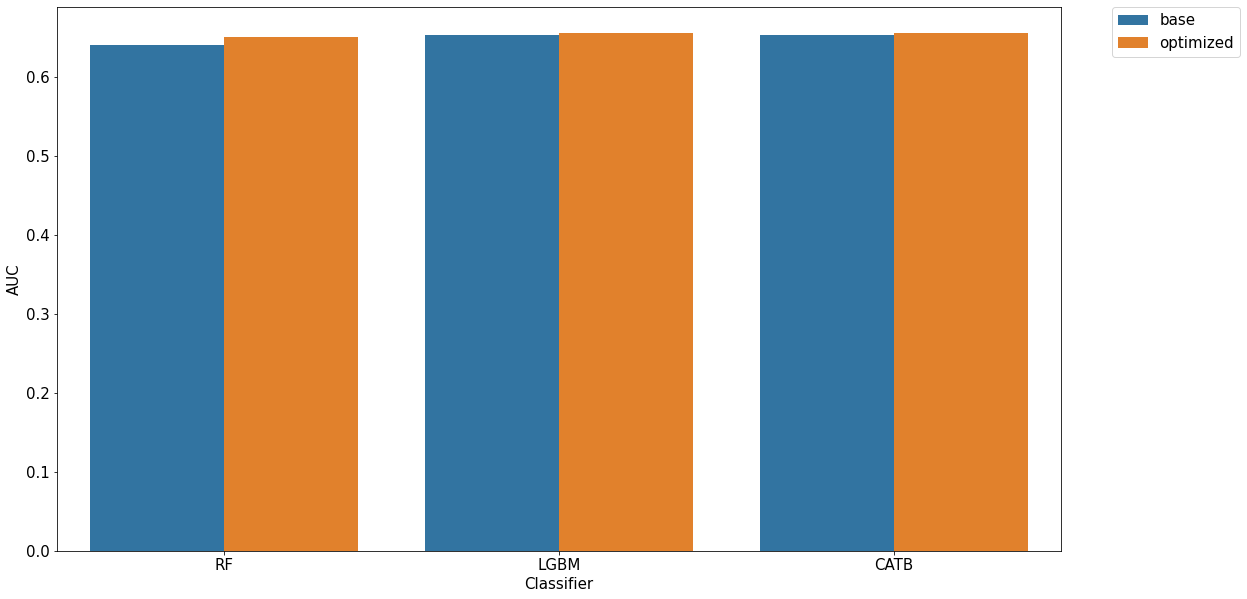

In [104]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=data_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Roc-Auc Comparison of Models

In [105]:
classifiers = [ rf_tuned,
                lgbm_tuned,
                catb_tuned]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    yproba = cls.predict_proba(X_test_importance)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table.sort_values('auc',ascending=False,inplace=True)

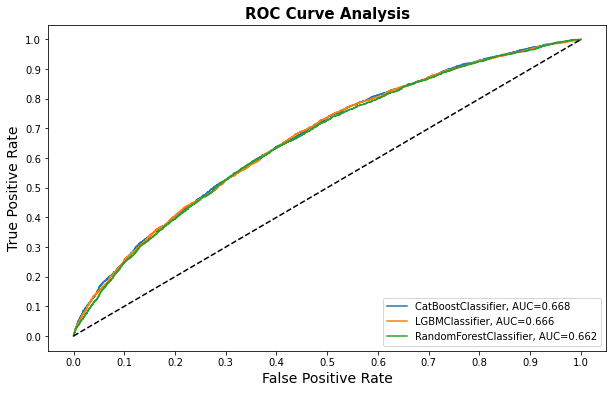

In [106]:
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=14)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=14)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

In [107]:
def test_scores(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    
    return auc, accuracy, recall


classifiers = [ rf_tuned,
                lgbm_tuned,
                catb_tuned]

# Define a result table as a DataFrame
test_result = pd.DataFrame(columns=['classifiers', 'accuracy','recall','auc'])

# Train the models and record the results
for cls in classifiers:
    y_test_preds = cls.predict_proba(X_test_importance)[:,1]
    
    test_auc, test_accuracy, test_recall = test_scores(y_test,y_test_preds, 0.5) # thresh = 0.5
    
    test_result = test_result.append({'classifiers':cls.__class__.__name__,
                                        'accuracy':test_accuracy, 
                                        'recall':test_recall, 
                                        'auc':test_auc}, ignore_index=True)


# Set name of the classifiers as index labels
test_result.set_index('classifiers', inplace=True)
test_result.sort_values('auc',ascending=False,inplace=True)

In [108]:
test_result

,accuracy,recall,auc
classifiers,,,
CatBoostClassifier,0.642037,0.586500,0.667644
LGBMClassifier,0.639320,0.581135,0.665777
RandomForestClassifier,0.613147,0.619580,0.661578


In [109]:
import plotly.graph_objs as go

trace1=go.Bar(
                x=test_result.index,
                y=test_result.accuracy,
                name="Accuracy",
                marker= dict(color = 'rgba(100, 20, 30, 0.7)',
                            line=dict(color='rgb(0,0,0)',width=1.9)),
                text=round(test_result.accuracy,3),textposition='auto')
trace2=go.Bar(
                x=test_result.index,
                y=test_result.recall,
                name="Recall",
                marker=dict(color = 'rgba(56, 140, 200, 0.7)',
                           line=dict(color='rgb(0,0,0)',width=1.9)),
                text=round(test_result.recall,3),textposition='auto')
trace3=go.Bar(
                x=test_result.index,
                y=test_result.auc,
                name="AUC",
                marker=dict(color = 'rgba(120, 180, 20, 0.7)',
                           line=dict(color='rgb(0,0,0)',width=1.9)),
                text=round(test_result.auc,3),textposition='auto')

edit_df=[trace1,trace2,trace3]
layout = { 'barmode':'group',
           'title_text':'Accuracy, Recall and AUC Plot Readmitted' }

fig= go.Figure(data=edit_df,layout=layout)
#plt.savefig('graph.png')
fig.show()

# 8. Prediction Result

# Model Selection: Best Classifier

In [110]:
best_model = catb_tuned

y_train_preds = best_model.predict_proba(X_train_importance)[:,1]
y_valid_preds = best_model.predict_proba(X_val_importance)[:,1]
y_test_preds = best_model.predict_proba(X_test_importance)[:,1]

In [111]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_fscore, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
val_auc, val_accuracy, val_recall, val_precision, val_fscore,val_specificity = print_report(y_val,y_val_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_fscore, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.704
accuracy:0.646
recall:0.614
precision:0.656
fscore:0.634
specificity:0.679
 
Validation:
AUC:0.654
accuracy:0.610
recall:0.591
precision:0.616
fscore:0.603
specificity:0.629
 
Test:
AUC:0.668
accuracy:0.642
recall:0.586
precision:0.175
fscore:0.270
specificity:0.649
 


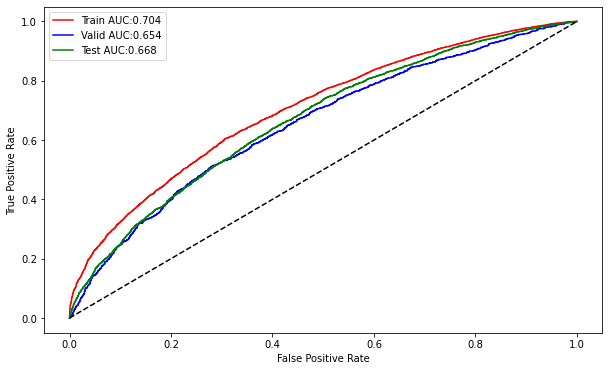

In [112]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_preds)
auc_val = roc_auc_score(y_val, y_val_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

fig, ax = plt.subplots(figsize=(10,6)) 
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_val, tpr_val, 'b-',label ='Valid AUC:%.3f'%auc_val)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

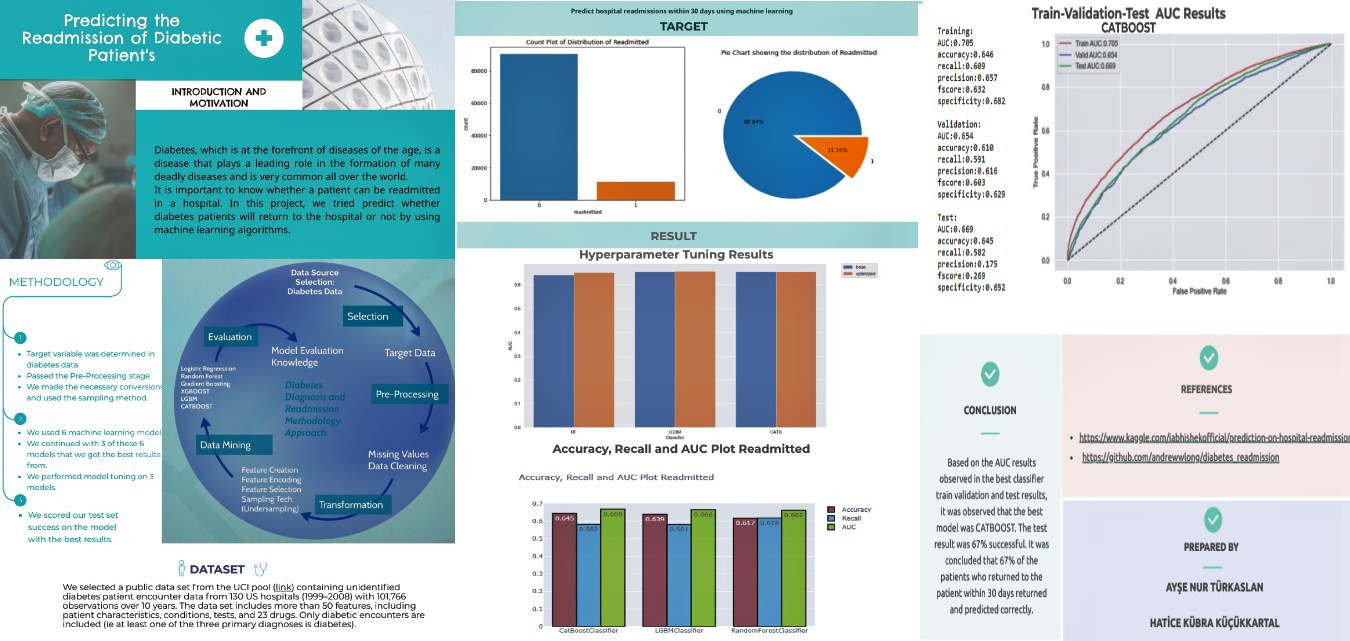

In [113]:
from PIL import Image
Image.open('../input/poster/diabetes_classification_analysis_results_POSTER.jpeg')

[presentation]!(http://prezi.com/view/TJ6WPvqUV5962zIIeEnV/)